---
Proyecto Aprendizaje de Maquina
---
**Diego Arguello**


# 1 Importación de Información y limpieza de datos

Imortación de Librerias

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import io
from google.colab import files
import keras
from keras.models import Sequential 
from keras.layers import Dense 
from yellowbrick.model_selection import CVScores
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
np.set_printoptions(suppress=True)

In [3]:
#Importar archivo de datos
uploaded = files.upload()

Saving datos.xlsx to datos.xlsx


In [4]:
# Crear un data frame de los datos de formato excel ".xlsx"
data= pd.read_excel('datos.xlsx',0,0)

In [5]:
#Crear data frame
df=data.drop(columns=['Ficha#','FECHA INGRESO CASO','SECCION CONSULAR', 'HORA INGRESO','TIPO DE ATENCION','PAÍS EN EL EXTERIOR','APOYO ECONOMICO', 'VALOR APOYO','ESTADO', 'ULTIMA ACCION REALIZADA', 'ANTECEDENTES',
       'CÉDULA VULNERABLE', 'NOMBRES VULNERABLE', 'APELLIDOS VULNERABLE','FECHA NACIMIENTO VULNERABLE','GRUPO ETARIO VULNERABLE','TELÉFONO VULNERABLE', 
       'NÚMERO ACCIONES REALIZADAS','FECHA ÚLTIMA ACCIÓN','FUNCIONARIO CREACION FICHA','COORDINACIÓN ZONAL','CANTÓN DE RESIDENCIA SOLICITANTE','OFICINA'])
df.columns


Index(['TIPO SERVICIO', 'SEXO VULNERABLE', 'EDAD VULNERABLE',
       'OCUPACIÓN VULNERABLE', 'PROVINCIA DE RESIDENCIA SOLICITANTE'],
      dtype='object')

Se reduce el numero de columnas de 29 a 5



In [6]:
df.isnull().sum()

TIPO SERVICIO                              0
SEXO VULNERABLE                        28901
EDAD VULNERABLE                          267
OCUPACIÓN VULNERABLE                   29287
PROVINCIA DE RESIDENCIA SOLICITANTE        0
dtype: int64

In [7]:
#Eliminar los nulos
df=df.dropna()
print(df.shape)
print(df.isnull().sum())
df.head(5)

(24187, 5)
TIPO SERVICIO                          0
SEXO VULNERABLE                        0
EDAD VULNERABLE                        0
OCUPACIÓN VULNERABLE                   0
PROVINCIA DE RESIDENCIA SOLICITANTE    0
dtype: int64


,TIPO SERVICIO,SEXO VULNERABLE,EDAD VULNERABLE,OCUPACIÓN VULNERABLE,PROVINCIA DE RESIDENCIA SOLICITANTE
0,VULNERABLES (EMERGENCIA SANITARIA),MUJER,23.0,BACH. EN CIENCIAS,PICHINCHA
1,VULNERABLES (EMERGENCIA SANITARIA),HOMBRE,75.0,ADMINISTRADOR,PICHINCHA
2,VULNERABLES (EMERGENCIA SANITARIA),HOMBRE,23.0,ESTUDIANTE,PICHINCHA
3,VULNERABLES (EMERGENCIA SANITARIA),HOMBRE,61.0,EMPLEADO,PICHINCHA
4,VULNERABLES (EMERGENCIA SANITARIA),MUJER,60.0,PROFESOR EN GENERAL,PICHINCHA


In [8]:
#Verificar los grupos en la columna de sexo
df.groupby('SEXO VULNERABLE')['SEXO VULNERABLE'].count()
#Fitro de sexo eliminar "OTROS"
filtro=df ['SEXO VULNERABLE'] != "OTROS"
df = df[filtro]
df.groupby('SEXO VULNERABLE')['SEXO VULNERABLE'].count()
df.shape
#imprimir la vaible eliminada
print(df.groupby('SEXO VULNERABLE')['SEXO VULNERABLE'].count())

SEXO VULNERABLE
HOMBRE    14350
MUJER      9835
Name: SEXO VULNERABLE, dtype: int64


In [9]:
#Fitro de profesiones y remplazo
df.loc[df['OCUPACIÓN VULNERABLE'] != "ESTUDIANTE", 'OCUPACIÓN VULNERABLE'] = "EMPLEADO"
df.groupby('OCUPACIÓN VULNERABLE')['OCUPACIÓN VULNERABLE'].count()

OCUPACIÓN VULNERABLE
EMPLEADO      14146
ESTUDIANTE    10039
Name: OCUPACIÓN VULNERABLE, dtype: int64

In [10]:
Provincias = df.groupby('PROVINCIA DE RESIDENCIA SOLICITANTE')['PROVINCIA DE RESIDENCIA SOLICITANTE'].count()
print(Provincias)
filtro=df ['PROVINCIA DE RESIDENCIA SOLICITANTE'] != "-- SELECCIONE --"
df = df[filtro]
Provincias = df.groupby('PROVINCIA DE RESIDENCIA SOLICITANTE')['PROVINCIA DE RESIDENCIA SOLICITANTE'].count()
print(Provincias)

PROVINCIA DE RESIDENCIA SOLICITANTE
-- SELECCIONE --      23
AZUAY               3784
BOLIVAR               53
CARCHI                62
CAÑAR               1838
CHIMBORAZO           555
COTOPAXI             203
EL ORO               737
ESMERALDAS           662
EXTRANJERO           277
GALÁPAGOS             15
GUAYAS              5366
IMBABURA             660
LOJA                 653
LOS RIOS             462
MANABI              2191
MORONA SANTIAGO      434
NAPO                  61
ORELLANA              57
PASTAZA               53
PICHINCHA           4291
SANTA ELENA          238
STO DGO TSACHIL      833
SUCUMBIOS             66
TUNGURAHUA           506
ZAMORA CHINCHIPE     105
Name: PROVINCIA DE RESIDENCIA SOLICITANTE, dtype: int64
PROVINCIA DE RESIDENCIA SOLICITANTE
AZUAY               3784
BOLIVAR               53
CARCHI                62
CAÑAR               1838
CHIMBORAZO           555
COTOPAXI             203
EL ORO               737
ESMERALDAS           662
EXTRANJERO           2

In [11]:
#df.groupby('TIPO SERVICIO')['TIPO SERVICIO'].count()
df['TIPO SERVICIO'].value_counts()

VULNERABLES (EMERGENCIA SANITARIA)               4144
AUTORIZACIÓN DE SALIDA DEL PAIS (ART 109 NNA)    4051
DEPORTADOS/DETENIDOS                             3955
VULNERABLE (OTROS)                               2635
VULNERABLES (ASISTENCIA HUMANITARIA)             2387
PERSONAS PRIVADAS DE LA LIBERTAD(PPL)            2025
INFORMACION                                      1770
ORIENTACION JURIDICA                              506
REPATRIACION DE RESTOS MORTALES                   384
LOCALIZACION/DESAPARECIDOS                        380
TRAFICO ILICITO DE MIGRANTES                      337
NOTAS VERBALES                                    319
VULNERABLES (SITUACION ECONOMICA)                 254
VULNERABLE (SALUD)                                252
JUICIO DE ALIMENTOS                               185
OTRAS INSTITUCIONES                                82
PROBLEMAS ECONOMICOS                               70
MENAJE DE CASA                                     61
RESTITUCION INTERNACIONAL NN

In [12]:
df.dtypes
df.describe()
#df['TIPO SERVICIO'].value_counts()

,EDAD VULNERABLE
count,24162.000000
mean,30.025329
std,16.879098
min,0.000000
25%,17.000000
50%,27.000000
75%,41.000000
max,114.000000


# 2 Preparación de datos
Conversión de variables


In [13]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
df2=df.copy()
df.head(1)

,TIPO SERVICIO,SEXO VULNERABLE,EDAD VULNERABLE,OCUPACIÓN VULNERABLE,PROVINCIA DE RESIDENCIA SOLICITANTE
0,VULNERABLES (EMERGENCIA SANITARIA),MUJER,23.0,EMPLEADO,PICHINCHA


In [14]:
#Trasformación de vARIABLES CATEGORICAS A NUMERICAS
df2['SEXO VULNERABLE'] = lb_make.fit_transform(df2['SEXO VULNERABLE'])
df2['OCUPACIÓN VULNERABLE'] = lb_make.fit_transform(df2['OCUPACIÓN VULNERABLE'])
df2['PROVINCIA DE RESIDENCIA SOLICITANTE'] = lb_make.fit_transform(df2['PROVINCIA DE RESIDENCIA SOLICITANTE'])
df2['TIPO SERVICIO'] = lb_make.fit_transform(df2['TIPO SERVICIO'])
df2.head(3)

,TIPO SERVICIO,SEXO VULNERABLE,EDAD VULNERABLE,OCUPACIÓN VULNERABLE,PROVINCIA DE RESIDENCIA SOLICITANTE
0,30,1,23.0,0,19
1,30,0,75.0,0,19
2,30,0,23.0,1,19


#Analisis de **CLUSTER**

**Graficar Variables**



In [15]:
X=df2
#X1.shape
#X1.head(10)
X.describe()
X.head(5)

,TIPO SERVICIO,SEXO VULNERABLE,EDAD VULNERABLE,OCUPACIÓN VULNERABLE,PROVINCIA DE RESIDENCIA SOLICITANTE
0,30,1,23.0,0,19
1,30,0,75.0,0,19
2,30,0,23.0,1,19
3,30,0,61.0,0,19
4,30,1,60.0,0,19


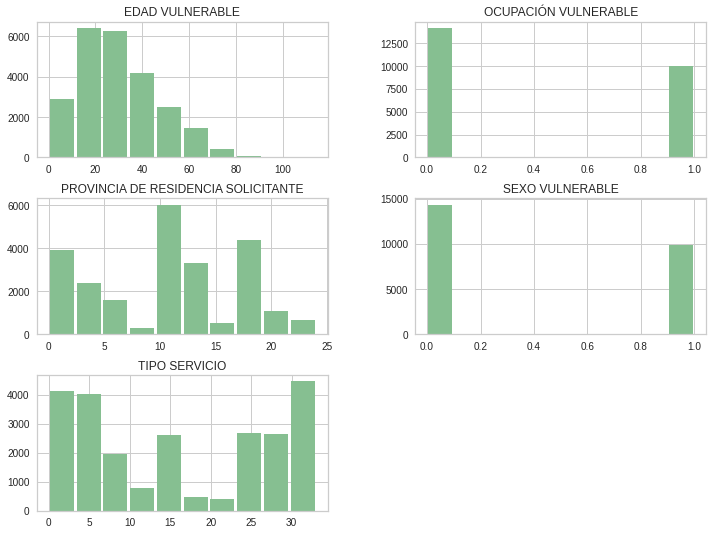

In [16]:
#VISUALIZAR VARIABLES
X.hist(figsize=(12,9),color='#86bf91', zorder=2, rwidth=0.9)
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


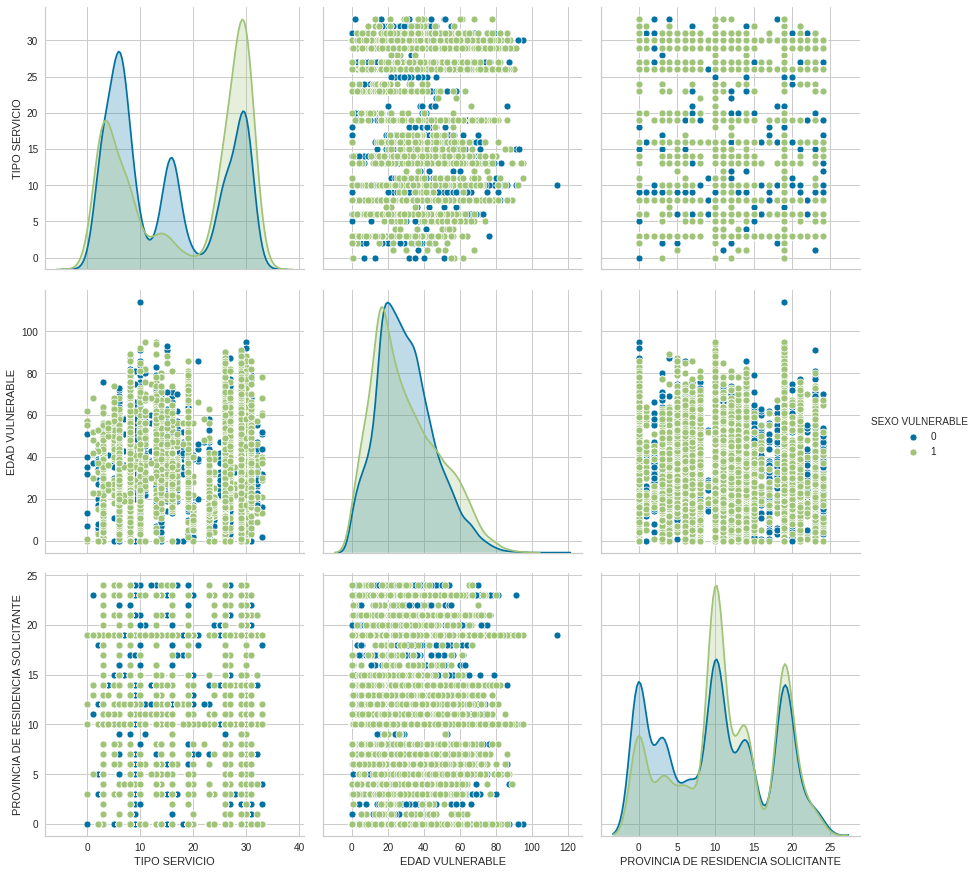

In [17]:
#Relacion de variables
import seaborn as sb
sb.pairplot(X, hue='SEXO VULNERABLE',size=4,vars=["TIPO SERVICIO","EDAD VULNERABLE","PROVINCIA DE RESIDENCIA SOLICITANTE"],kind='scatter')

**Metodo de Elbow**

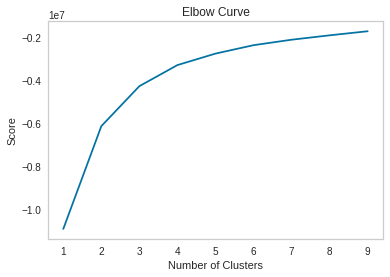

In [18]:
from sklearn.cluster import KMeans
Nc=range(1,10)
kmeans=[KMeans(n_clusters=i)for i in Nc]
kmeans
score=[kmeans[i].fit(X).score(X)for i in range(len(kmeans))]
plt.rcParams['axes.spines.right']=True
plt.rcParams['axes.spines.top']=True
plt.rcParams['axes.spines.left']=True
plt.rcParams['axes.spines.bottom']=True
plt.rcParams["xtick.labelbottom"]=True
plt.rcParams["xtick.bottom"]=True
plt.rcParams["ytick.left"]=True
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.grid()
plt.show()



---


#**Cluster con KMeans**

In [19]:
#Cluster
#KMeans clustering
X1 = X.iloc[:, 0:5].values 
n_clusters=4
kmeans= KMeans(n_clusters=n_clusters, max_iter=1000, algorithm = 'auto')
y=kmeans.fit_predict(X1)
Y = pd.DataFrame({'Y': y})
Y['Y'].value_counts()


1    7314
0    6250
3    5852
2    4746
Name: Y, dtype: int64

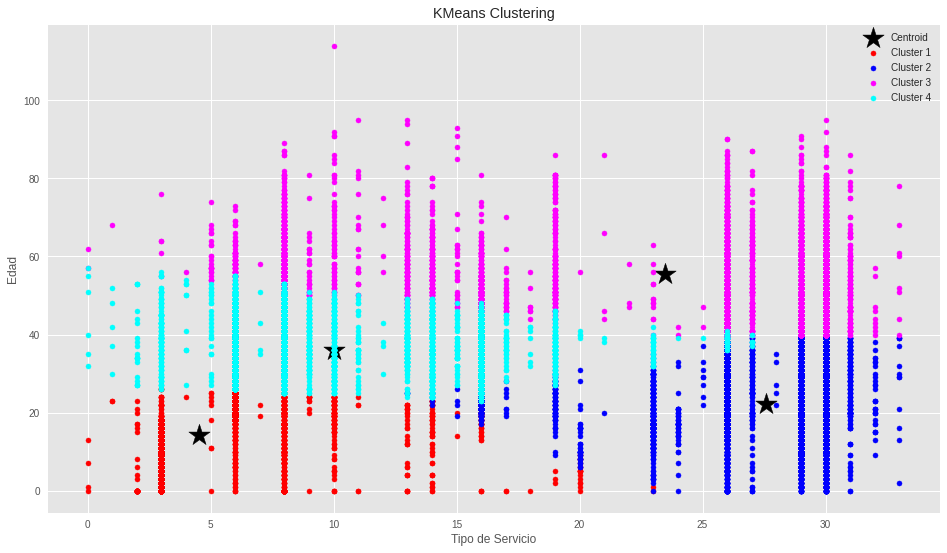

In [20]:
# Graficar el cluster
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,2], s=500, c='black', label='Centroid',marker="*")
plt.scatter(X1[y == 0,0], X1[y==0,2], s=25, c='red', label='Cluster 1')
plt.scatter(X1[y == 1,0], X1[y==1,2], s=25, c='blue', label='Cluster 2')
plt.scatter(X1[y == 2,0], X1[y==2,2], s=25, c='magenta', label='Cluster 3')
plt.scatter(X1[y == 3,0], X1[y==3,2], s=25, c='cyan', label='Cluster 4')
plt.title('KMeans Clustering')
plt.xlabel('Tipo de Servicio')
plt.ylabel('Edad')
plt.legend()
plt.show()

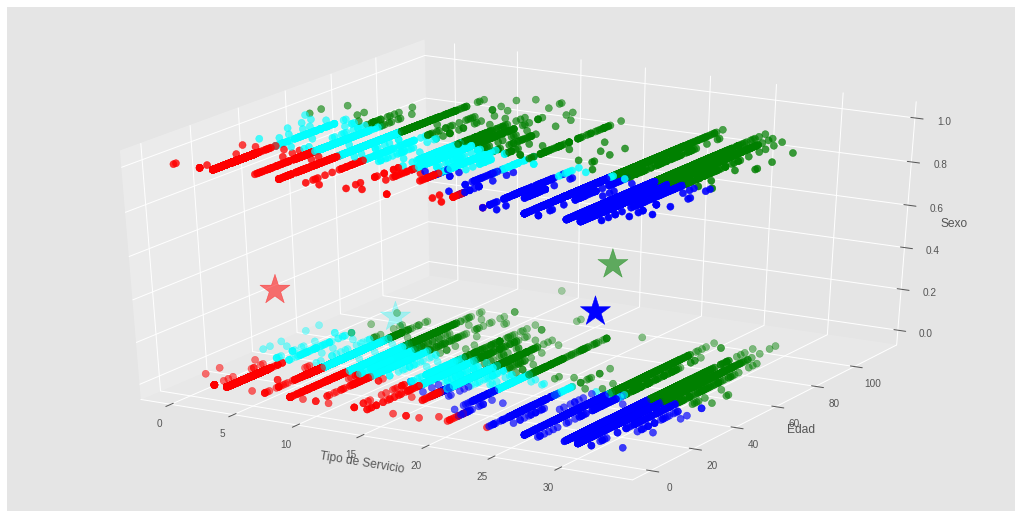

In [21]:
#%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (14, 7)
plt.style.use('ggplot')
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','blue','green','cyan']
asignar=[]
for row in labels:
    asignar.append(colores[row])
fig = plt.figure()
ax = Axes3D(fig)
ax.set_zlabel('Sexo')
plt.xlabel('Tipo de Servicio')
plt.ylabel('Edad')
ax.scatter(X1[:, 0], X1[:, 2], X1[:, 1], c=asignar,s=50)
ax.scatter(C[:, 0], C[:, 2], C[:, 1], marker='*', c=colores, s=1000)


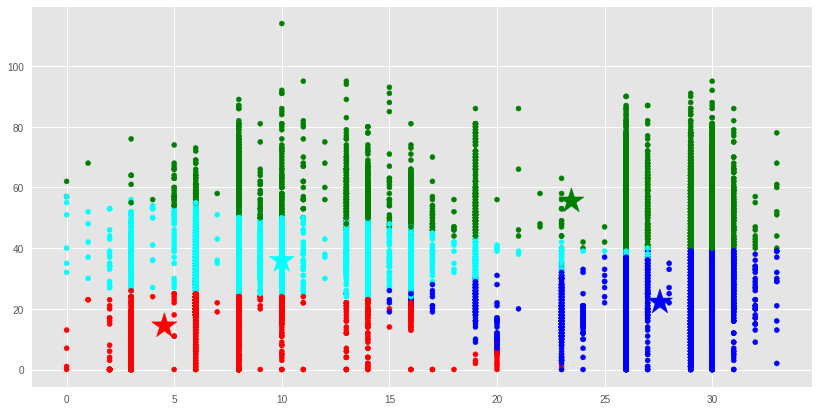

In [22]:
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=700)
plt.scatter(X1[:, 0], X1[:, 2], c=asignar, s=25)
plt.show()

Analisis del cluster

In [23]:
from google.colab import files
df3=df.copy()# dataframe con los calores del cluster y las variables categoricas
df4=df2.copy()# dataframe con valores numereicos mas la columna del cluster
df3['Y']=y
df4['Y']=y
df3.to_csv('Cluster.csv')
df4.to_csv('ClusterClasificacion.csv')

In [ ]:
#Descargar Archivo Variables categoricas
files.download("Cluster.csv")

In [ ]:
#Descargar Archivo variables Numericas
files.download('ClusterClasificacion.csv')

In [ ]:
#crear los clusters
cl0 = df3.loc[df3['Y']==0]
cl1 = df3.loc[df3['Y']==1]
cl2 = df3.loc[df3['Y']==2]
cl3 = df3.loc[df3['Y']==3]

**Resultado de clusters**

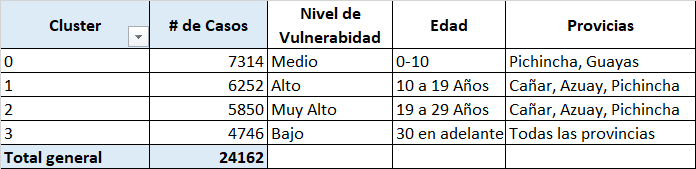

#**Modelo de Clasificación**

In [24]:
Xc=df4.iloc[:,:-1].values
yc=df4.iloc[:,-1].values
df4.head(3)

,TIPO SERVICIO,SEXO VULNERABLE,EDAD VULNERABLE,OCUPACIÓN VULNERABLE,PROVINCIA DE RESIDENCIA SOLICITANTE,Y
0,30,1,23.0,0,19,1
1,30,0,75.0,0,19,2
2,30,0,23.0,1,19,1


In [25]:
X_train, X_test, y_train, y_test = train_test_split(Xc, yc, test_size=0.30, random_state=42)
print(X_train)
len(X_train)

[[29.  0. 11.  1. 10.]
 [29.  0. 26.  1. 10.]
 [26.  0. 25.  0.  0.]
 ...
 [30.  1. 31.  0. 19.]
 [10.  1. 37.  0. 19.]
 [16.  1. 26.  0.  6.]]


16913

#Clasificador con red Neuronal ANN

---



In [ ]:
#Modelo de clasificacion con red neuronal
model = Sequential() 
model.add(Dense(10, input_dim=5, init= "uniform" , activation= "sigmoid" )) 
#model.add(Dense(4, init= "uniform" , activation= "relu" )) 
model.add(Dense(1, init= "uniform" , activation= "sigmoid" )) 
     # Compile model 
model.compile(loss= "binary_crossentropy" , optimizer= "adam" , metrics=["accuracy"]) 
     # Fit the model 
model.fit(X_train, y_train, nb_epoch=400, batch_size=100, verbose=0) 
     # evaluate the model 
scores = model.evaluate(X_train, y_train, verbose=0) 
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100)) 
#cvscores.append(scores[1] * 100)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, input_dim=5, activation="sigmoid", kernel_initializer="uniform")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


accuracy: 26.02%


In [ ]:
scores = model.evaluate(X_test, y_test, verbose=0) 
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100)) 
#print(model.metrics_names)
#print(scores)
#cvscores.append(scores[1] * 100)

accuracy: 25.53%


#Clasificador SVM 

---



In [28]:
from sklearn.svm import SVC
cls=SVC(kernel="sigmoid",gamma = 'auto')
#cls.fit(Xc,yc)
cls.fit(X_train,y_train)

#valores de precision
score_train=cls.score(X_train,y_train)
print('Accuracy Entrenamiento: '+ str(round(score_train,4)))
score_test=cls.score(X_test,y_test)
print('Accuracy Test: '+str(round(score_test,4)))
score_t=cls.score(X,y)
print('Accuracy Total: '+str(round(score_t,4)))
#Matriz y valores
yPred = cls.predict(X)
matrix_Conf = confusion_matrix(y, yPred)
report = classification_report(y, yPred)
print(matrix_Conf)
print(report)

Accuracy Entrenamiento: 0.3021
Accuracy Test: 0.304
Accuracy Total: 0.3027
[[   0 6247    1    2]
 [   0 7314    0    0]
 [   0 4746    0    0]
 [   0 5852    0    0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      6250
           1       0.30      1.00      0.46      7314
           2       0.00      0.00      0.00      4746
           3       0.00      0.00      0.00      5852

    accuracy                           0.30     24162
   macro avg       0.08      0.25      0.12     24162
weighted avg       0.09      0.30      0.14     24162



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
from sklearn.svm import SVC
cls=SVC(kernel="linear",gamma = 'auto')
#cls.fit(Xc,yc)
cls.fit(X_train,y_train)

#valores de precision
score_train=cls.score(X_train,y_train)
print('Accuracy Entrenamiento: '+ str(round(score_train,4)))
score_test=cls.score(X_test,y_test)
print('Accuracy Test: '+str(round(score_test,4)))
score_t=cls.score(X,y)
print('Accuracy Total: '+str(round(score_t,4)))
#Matriz y valores
yPred = cls.predict(X)
matrix_Conf = confusion_matrix(y, yPred)
report = classification_report(y, yPred)
print(matrix_Conf)
print(report)

Accuracy Entrenamiento: 0.9991
Accuracy Test: 0.9989
Accuracy Total: 0.999
[[6248    1    0    1]
 [   2 7310    2    0]
 [   0    1 4741    4]
 [   2   11    0 5839]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6250
           1       1.00      1.00      1.00      7314
           2       1.00      1.00      1.00      4746
           3       1.00      1.00      1.00      5852

    accuracy                           1.00     24162
   macro avg       1.00      1.00      1.00     24162
weighted avg       1.00      1.00      1.00     24162



In [27]:
from sklearn.svm import SVC
cls=SVC(kernel="rbf",gamma = 'auto')
#cls.fit(Xc,yc)
cls.fit(X_train,y_train)

#valores de precision
score_train=cls.score(X_train,y_train)
print('Accuracy Entrenamiento: '+ str(round(score_train,4)))
score_test=cls.score(X_test,y_test)
print('Accuracy Test: '+str(round(score_test,4)))
score_t=cls.score(X,y)
print('Accuracy Total: '+str(round(score_t,4)))
#Matriz y valores
yPred = cls.predict(X)
matrix_Conf = confusion_matrix(y, yPred)
report = classification_report(y, yPred)
print(matrix_Conf)
print(report)

Accuracy Entrenamiento: 0.9993
Accuracy Test: 0.9956
Accuracy Total: 0.9982
[[6242    2    6    0]
 [   1 7306    2    5]
 [   0    0 4738    8]
 [   3    7    9 5833]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6250
           1       1.00      1.00      1.00      7314
           2       1.00      1.00      1.00      4746
           3       1.00      1.00      1.00      5852

    accuracy                           1.00     24162
   macro avg       1.00      1.00      1.00     24162
weighted avg       1.00      1.00      1.00     24162



#Resultados

---



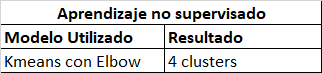

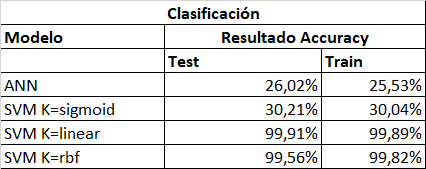